In [13]:
import pandas as pd

party_replace = {
    'PARTI KEADILAN RAKYAT (PKR)': 'PAKATAN HARAPAN (PH)',
    'PARTI TINDAKAN DEMOKRATIK (DAP)': 'PAKATAN HARAPAN (PH)',
    'PARTI ISLAM SE MALAYSIA (PAS)': 'PERIKATAN NASIONAL (PN)',
    'IKATAN DEMOKRATIK MALAYSIA (MUDA)': 'PAKATAN HARAPAN (PH)'
}

df = pd.read_csv('data/candidates_ge15.csv',usecols=['state','parlimen','party','result'])
df.party = df.party.replace(party_replace).fillna(df.party)
df = df[df.result == 1].drop('result',axis=1)
n_seats = df[['party']].groupby('party').size()
df = df[~df.state.isin(['Sabah','Sarawak','W.P. Labuan'])] # to add East Msia, comment out this line
df.party = df.party.map(party_replace).fillna(df.party)

vf = pd.read_csv('data/voters_ge15.csv',usecols=['state','parlimen','total'])\
    .rename(columns={'total':'voters'})\
        .groupby(['state','parlimen'])\
            .sum().reset_index()


df = pd.merge(df,vf,on=['state','parlimen'],how='left')
assert len(df[df.voters.isnull()]) == 0, 'Missing data!' # ensure complete merge
n_voters = (df[['party','voters']].groupby('party').mean()).to_dict()

df = df.sort_values(by='voters',ascending=False).reset_index(drop=True)
df

,state,parlimen,party,voters
0,Selangor,P.102 Bangi,PAKATAN HARAPAN (PH),303430
1,Selangor,P.111 Kota Raja,PAKATAN HARAPAN (PH),244712
2,Selangor,P.106 Damansara,PAKATAN HARAPAN (PH),239103
3,Selangor,P.104 Subang,PAKATAN HARAPAN (PH),230940
4,Johor,P.158 Tebrau,PAKATAN HARAPAN (PH),223301
...,...,...,...,...
160,Perak,P.067 Kuala Kangsar,PERIKATAN NASIONAL (PN),46985
161,Pahang,P.078 Cameron Highlands,BARISAN NASIONAL (BN),46020
162,W.P. Putrajaya,P.125 Putrajaya,PERIKATAN NASIONAL (PN),42881
163,Perak,P.061 Padang Rengas,PERIKATAN NASIONAL (PN),38686



PH is coloured in zzz, with 82 seats and an average size of of 130,650 voters across these seats.


PN is coloured in zzz, with 74 seats and an average size of of 92,889 voters across these seats.


BN is coloured in zzz, with 30 seats and an average size of of 70,671 voters across these seats.



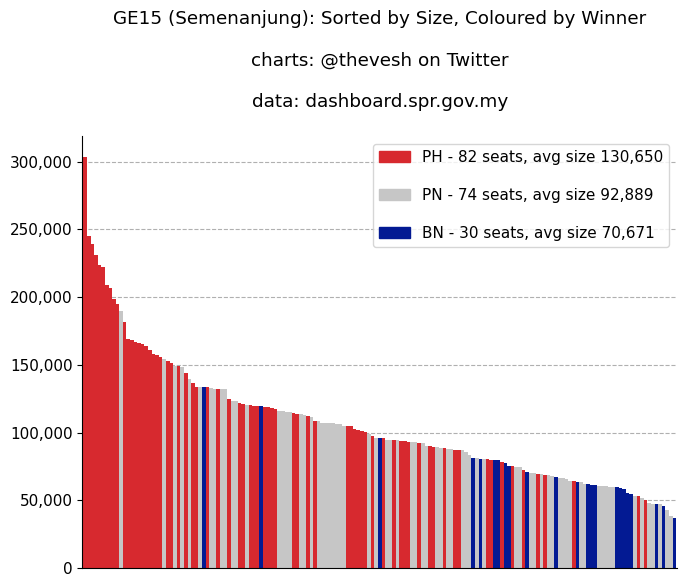

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as tkr

party_color = { # colors from SPR dashboard
    'PAKATAN HARAPAN (PH)':'#d7292f',
    'PERIKATAN NASIONAL (PN)':'#c6c6c6', # to ensure no red-green colour-blind clash
    'BARISAN NASIONAL (BN)':'#031a93',
    'GABUNGAN PARTI SARAWAK (GPS)': '#1f2c45',
    'PARTI WARISAN SABAH (WARISAN)': '#5bc5f0',
    'PARTI GABUNGAN RAKYAT SABAH (GRS)': '#5bc5f0',
    'BEBAS (BEBAS)': '#000000', 
    'PARTI KESEJAHTERAAN DEMOKRATIK MASYARAKAT (KDM)': '#000000',
    'PARTI BANGSA MALAYSIA (PBM)': '#000000'
}

df['color'] = df.party.map(party_color)

plt.rcParams.update({'font.size': 11,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dashed'})
plt.rcParams["figure.figsize"] = [7,6]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df.plot(kind='bar', width=1, y='voters', edgecolor='black', lw=0, color=df.color.tolist(), ax=ax)
ax.set_title(f'GE15 (Semenanjung): Sorted by Size, Coloured by Winner\n\ncharts: @thevesh on Twitter\n\ndata: dashboard.spr.gov.my\n')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('')
ax.axes.get_xaxis().set_visible(False)
ax.set_axisbelow(True)

patches = [mpatches.Patch(color=party_color[p], label=f'{p[-3:-1]} - {n_seats[p]} seats, avg size {n_voters["voters"][p]:,.0f}') for p in list(party_color.keys())[:3]]
ax.legend(handles=patches,labelspacing = 1.5)

# ALT text
for p in list(party_color.keys())[:3]: 
    print(f"""
{p[-3:-1]} is coloured in zzz, with {n_seats[p]} seats and an average size of of {n_voters["voters"][p]:,.0f} voters across these seats.
""")